## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import numpy as np
import random
from sklearn.metrics import mean_squared_error



In [2]:
df = pd.read_csv("/datasets/6_class.csv")

In [3]:
df.index

RangeIndex(start=0, stop=240, step=1)

ниже убеждаемся, что 'Unnamed: 0' это индекс и удаляем его:

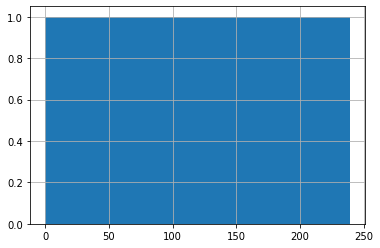

In [4]:
df['Unnamed: 0'].hist(bins=240);

In [5]:
df= df.drop('Unnamed: 0',axis=1)

In [6]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color
0,3068,0.002400,0.1700,16.12,0,Red
1,3042,0.000500,0.1542,16.60,0,Red
2,2600,0.000300,0.1020,18.70,0,Red
3,2800,0.000200,0.1600,16.65,0,Red
4,1939,0.000138,0.1030,20.06,0,Red


In [7]:
num = ['Temperature (K)','Luminosity(L/Lo)','Radius(R/Ro)','Absolute magnitude(Mv)']

In [8]:
cat = ['Star color','Star type']

## Предобработка и анализ данных

Замечаем дубликаты в названиях звезд, избвимся от них:

In [9]:
df['Star color'].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'Blue ',
       'yellowish', 'Yellowish', 'Orange-Red', 'Blue white ',
       'Blue-White'], dtype=object)

In [10]:
df['Star type'].unique()

array([0, 1, 2, 3, 4, 5])

In [11]:
df['Star color'] = df['Star color'].str.lower()

In [12]:
df['Star color'] = df['Star color'].str.replace('-',' ')

In [13]:
df['Star color'] = df['Star color'].str.rstrip()

In [16]:
df['Star color'].unique()

array(['red', 'blue white', 'white', 'yellowish white',
       'pale yellow orange', 'blue', 'whitish', 'yellow white', 'orange',
       'white yellow', 'yellowish', 'orange red'], dtype=object)

Убеждаемся, что пропуски отсутвуют.

In [17]:
df.isna().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
dtype: int64

In [18]:
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


C Это самые горячие звезды, температура поверхности которых может достигать 50 000 Кельвинов. Их цвет - голубой или голубовато-белый. 
Звезды класса W:
Это также горячие звезды, температура поверхности которых может быть около 100 000 Кельвинов. 

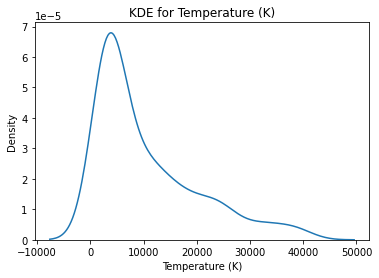

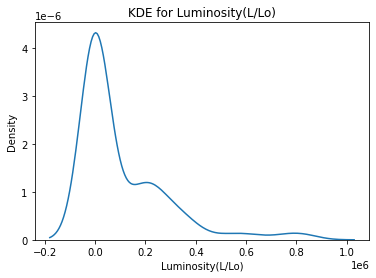

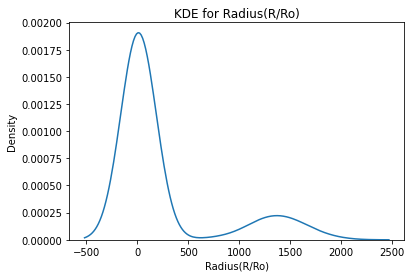

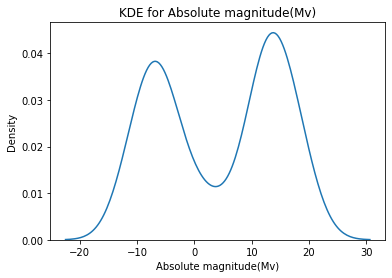

In [16]:
for a in num:
    plt.figure()
    sns.kdeplot(data=df, x=a)
    plt.title(f'KDE for {a}')
    plt.show()

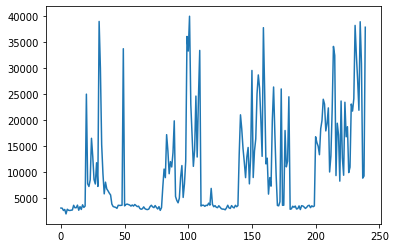

In [19]:
df['Temperature (K)'].plot();

In [18]:
df['Temperature (K)'].max()

40000

## Построение базовой нейронной сети

In [20]:
num = ['Luminosity(L/Lo)','Radius(R/Ro)','Absolute magnitude(Mv)']

In [21]:
X = df.drop(["Temperature (K)"],axis=1)
y = df[["Temperature (K)"]]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42,shuffle=True)

In [22]:
X

,Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color
0,0.002400,0.1700,16.12,0,red
1,0.000500,0.1542,16.60,0,red
2,0.000300,0.1020,18.70,0,red
3,0.000200,0.1600,16.65,0,red
4,0.000138,0.1030,20.06,0,red
...,...,...,...,...,...
235,374830.000000,1356.0000,-9.93,5,blue
236,834042.000000,1194.0000,-10.63,5,blue
237,537493.000000,1423.0000,-10.73,5,white
238,404940.000000,1112.0000,-11.23,5,white


In [23]:
scaler = StandardScaler() 

In [24]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')


In [25]:
numeric_data = X_train[num]

In [26]:
numeric_data2 = X_test[num]

In [27]:
scaled_X_train= scaler.fit_transform(numeric_data)

In [28]:
scaled_X_test= scaler.transform(numeric_data2)

In [29]:
cat_data = X_train[cat]

In [30]:
cat_data2 = X_test[cat]

In [31]:
X_train_cat = ohe.fit_transform(cat_data)
X_test_cat = ohe.transform(cat_data2) 

In [32]:
train_df = pd.DataFrame(
    data=np.hstack([scaled_X_train, X_train_cat]),
    columns=num + list(ohe.get_feature_names(cat))
)

In [33]:
#train_df['type'] = X_train['Star type']

In [34]:
train_df

,Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color_blue,Star color_blue white,Star color_orange,Star color_pale yellow orange,Star color_red,Star color_white,Star color_white yellow,Star color_whitish,Star color_yellow white,Star color_yellowish,Star color_yellowish white,Star type_0,Star type_1,Star type_2,Star type_3,Star type_4,Star type_5
0,-0.605495,-0.432609,0.921181,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.605495,-0.432415,1.215105,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.605495,-0.431926,0.696871,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.605495,-0.432616,0.892176,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.605495,-0.432413,1.201569,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,1.560860,-0.304917,-1.003824,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
164,-0.605495,-0.432352,0.698998,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
165,-0.605495,-0.431024,0.162008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
166,0.877474,1.867318,-1.236836,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [35]:
test_df = pd.DataFrame(
    data=np.hstack([scaled_X_test, X_test_cat]),
    columns=num + list(ohe.get_feature_names(cat))
)

In [36]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.use_deterministic_algorithms(True)

In [37]:
train_X = torch.FloatTensor(train_df.to_numpy())
test_X= torch.FloatTensor(test_df.to_numpy())
train_y = torch.FloatTensor(y_train.to_numpy())  
test_y = torch.FloatTensor(y_test.to_numpy())

Cоздаем первую сеть c возможностью задавать количество слоев и нейронов, чтобы отследить динамику:

In [39]:
class Baseline(nn.Module):
    def __init__(self, layer_sizes=[20, 200, 36, 16, 1]):
        super(Baseline, self).__init__()
        self.layers = nn.ModuleList()
        self.relu = nn.ReLU()
        
       
        for i in range(len(layer_sizes)-1):
            self.layers.append(nn.Linear(layer_sizes[i], layer_sizes[i+1]))
        
    def forward(self, x):
        for i, layer in enumerate(self.layers):
            x = layer(x)
            if i != len(self.layers)-1:
                x = self.relu(x)
        return x

Cоздаем функцию для обучени и отслеживая динамики rmse в зависимости от парамертов выше:

In [41]:
def train_with_rmse(model,batch_size, X_train, y_train, X_val, y_val, num_epochs=2000):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)
    
    train_rmse = []
    val_rmse = []
    
    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        permutation = torch.randperm(X_train.size()[0])
        
        for i in range(0, X_train.size()[0], batch_size):
            indices = permutation[i:i+batch_size]
            batch_X = X_train[indices]
            batch_y = y_train[indices]
            
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        model.eval()
        with torch.no_grad():
            train_preds = model(X_train)
            train_rmse.append(np.sqrt(mean_squared_error(y_train.numpy(), train_preds.numpy())))
            
            val_preds = model(X_val)
            val_rmse.append(np.sqrt(mean_squared_error(y_val.numpy(), val_preds.numpy())))
        
        if (epoch+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}] | Train RMSE: {train_rmse[-1]:.2f} K | Val RMSE: {val_rmse[-1]:.2f}')
    

In [42]:
deep_model = Baseline(layer_sizes=[20, 256, 128, 64, 32, 16, 1])

In [43]:
train_with_rmse(model=deep_model,batch_size=30,
    X_train=train_X,
    y_train=train_y,
    X_val=test_X,
    y_val=test_y)

Epoch [100/2000] | Train RMSE: 12365.17 K | Val RMSE: 13055.12
Epoch [200/2000] | Train RMSE: 6695.56 K | Val RMSE: 7070.50
Epoch [300/2000] | Train RMSE: 5927.10 K | Val RMSE: 6264.29
Epoch [400/2000] | Train RMSE: 5444.86 K | Val RMSE: 5825.07
Epoch [500/2000] | Train RMSE: 5063.77 K | Val RMSE: 5521.09
Epoch [600/2000] | Train RMSE: 4759.46 K | Val RMSE: 5305.28
Epoch [700/2000] | Train RMSE: 4522.26 K | Val RMSE: 5165.21
Epoch [800/2000] | Train RMSE: 4343.48 K | Val RMSE: 5085.03
Epoch [900/2000] | Train RMSE: 4208.37 K | Val RMSE: 5053.64
Epoch [1000/2000] | Train RMSE: 4106.99 K | Val RMSE: 5050.75
Epoch [1100/2000] | Train RMSE: 4028.84 K | Val RMSE: 5068.17
Epoch [1200/2000] | Train RMSE: 3966.47 K | Val RMSE: 5087.55
Epoch [1300/2000] | Train RMSE: 3913.50 K | Val RMSE: 5104.16
Epoch [1400/2000] | Train RMSE: 3870.61 K | Val RMSE: 5121.41
Epoch [1500/2000] | Train RMSE: 3834.09 K | Val RMSE: 5131.32
Epoch [1600/2000] | Train RMSE: 3801.66 K | Val RMSE: 5140.03
Epoch [1700/200

In [44]:
deep_model2 = Baseline(layer_sizes=[20, 256, 36, 128, 64,8, 32, 16, 1])

In [45]:
train_with_rmse(model=deep_model2,batch_size=50,
    X_train=train_X,
    y_train=train_y,
    X_val=test_X,
    y_val=test_y)

Epoch [100/2000] | Train RMSE: 13747.64 K | Val RMSE: 14484.88
Epoch [200/2000] | Train RMSE: 7082.28 K | Val RMSE: 7519.98
Epoch [300/2000] | Train RMSE: 6134.27 K | Val RMSE: 6485.63
Epoch [400/2000] | Train RMSE: 5620.09 K | Val RMSE: 5982.07
Epoch [500/2000] | Train RMSE: 5244.42 K | Val RMSE: 5667.40
Epoch [600/2000] | Train RMSE: 4938.05 K | Val RMSE: 5424.87
Epoch [700/2000] | Train RMSE: 4678.88 K | Val RMSE: 5246.80
Epoch [800/2000] | Train RMSE: 4469.77 K | Val RMSE: 5135.16
Epoch [900/2000] | Train RMSE: 4303.88 K | Val RMSE: 5075.29
Epoch [1000/2000] | Train RMSE: 4178.40 K | Val RMSE: 5040.28
Epoch [1100/2000] | Train RMSE: 4084.11 K | Val RMSE: 5034.30
Epoch [1200/2000] | Train RMSE: 4012.35 K | Val RMSE: 5051.49
Epoch [1300/2000] | Train RMSE: 3949.47 K | Val RMSE: 5056.46
Epoch [1400/2000] | Train RMSE: 3896.23 K | Val RMSE: 5078.65
Epoch [1500/2000] | Train RMSE: 3851.22 K | Val RMSE: 5102.83
Epoch [1600/2000] | Train RMSE: 3809.24 K | Val RMSE: 5118.66
Epoch [1700/200

In [58]:
simple_model = Baseline(layer_sizes=[20, 100, 50,25, 1])

In [59]:
train_with_rmse(model=simple_model,batch_size=50,
    X_train=train_X,
    y_train=train_y,
    X_val=test_X,
    y_val=test_y)

Epoch [100/2000] | Train RMSE: 13944.49 K | Val RMSE: 14687.16
Epoch [200/2000] | Train RMSE: 13838.50 K | Val RMSE: 14576.91
Epoch [300/2000] | Train RMSE: 13435.25 K | Val RMSE: 14156.28
Epoch [400/2000] | Train RMSE: 12567.67 K | Val RMSE: 13251.35
Epoch [500/2000] | Train RMSE: 11225.94 K | Val RMSE: 11854.82
Epoch [600/2000] | Train RMSE: 9659.09 K | Val RMSE: 10223.08
Epoch [700/2000] | Train RMSE: 8293.49 K | Val RMSE: 8796.74
Epoch [800/2000] | Train RMSE: 7416.28 K | Val RMSE: 7858.87
Epoch [900/2000] | Train RMSE: 6909.73 K | Val RMSE: 7289.68
Epoch [1000/2000] | Train RMSE: 6594.44 K | Val RMSE: 6918.93
Epoch [1100/2000] | Train RMSE: 6363.25 K | Val RMSE: 6650.31
Epoch [1200/2000] | Train RMSE: 6182.61 K | Val RMSE: 6440.79
Epoch [1300/2000] | Train RMSE: 6026.27 K | Val RMSE: 6272.50
Epoch [1400/2000] | Train RMSE: 5884.45 K | Val RMSE: 6128.80
Epoch [1500/2000] | Train RMSE: 5749.35 K | Val RMSE: 6003.35
Epoch [1600/2000] | Train RMSE: 5620.89 K | Val RMSE: 5888.78
Epoch 

In [60]:
simple_model = Baseline(layer_sizes=[20, 100,25, 1])

In [61]:
train_with_rmse(model=simple_model,batch_size=50,
    X_train=train_X,
    y_train=train_y,
    X_val=test_X,
    y_val=test_y)

Epoch [100/2000] | Train RMSE: 13951.87 K | Val RMSE: 14694.88
Epoch [200/2000] | Train RMSE: 13946.17 K | Val RMSE: 14689.00
Epoch [300/2000] | Train RMSE: 13929.84 K | Val RMSE: 14672.15
Epoch [400/2000] | Train RMSE: 13899.09 K | Val RMSE: 14640.35
Epoch [500/2000] | Train RMSE: 13851.88 K | Val RMSE: 14591.42
Epoch [600/2000] | Train RMSE: 13787.11 K | Val RMSE: 14524.29
Epoch [700/2000] | Train RMSE: 13703.94 K | Val RMSE: 14438.05
Epoch [800/2000] | Train RMSE: 13602.53 K | Val RMSE: 14332.62
Epoch [900/2000] | Train RMSE: 13482.22 K | Val RMSE: 14207.56
Epoch [1000/2000] | Train RMSE: 13341.31 K | Val RMSE: 14060.72
Epoch [1100/2000] | Train RMSE: 13182.03 K | Val RMSE: 13894.52
Epoch [1200/2000] | Train RMSE: 13004.98 K | Val RMSE: 13709.46
Epoch [1300/2000] | Train RMSE: 12807.66 K | Val RMSE: 13502.85
Epoch [1400/2000] | Train RMSE: 12590.21 K | Val RMSE: 13274.57
Epoch [1500/2000] | Train RMSE: 12359.43 K | Val RMSE: 13032.53
Epoch [1600/2000] | Train RMSE: 12109.35 K | Val 

In [62]:
deep_model3 = Baseline(layer_sizes=[20, 30, 40,50, 100,3,1])

In [63]:
train_with_rmse(model=deep_model3,batch_size=50,
    X_train=train_X,
    y_train=train_y,
    X_val=test_X,
    y_val=test_y)

Epoch [100/2000] | Train RMSE: 13952.38 K | Val RMSE: 14695.43
Epoch [200/2000] | Train RMSE: 13952.35 K | Val RMSE: 14695.40
Epoch [300/2000] | Train RMSE: 13952.32 K | Val RMSE: 14695.37
Epoch [400/2000] | Train RMSE: 13952.29 K | Val RMSE: 14695.34
Epoch [500/2000] | Train RMSE: 13952.26 K | Val RMSE: 14695.31
Epoch [600/2000] | Train RMSE: 13952.24 K | Val RMSE: 14695.29
Epoch [700/2000] | Train RMSE: 13952.21 K | Val RMSE: 14695.25
Epoch [800/2000] | Train RMSE: 13952.18 K | Val RMSE: 14695.23


KeyboardInterrupt: 

In [ ]:
Делаем вывод, что более сложные модели справляются лучше

Cтроим график с лучшей из моделей:

In [74]:
def plot_(m,x,y):
    m.eval()
    with torch.no_grad():
        pred = m(x).squeeze()

    y_true = y.numpy()
    y_pred = pred.numpy()

    
    indices = np.arange(len(y_true))

    plt.figure(figsize=(14, 8))

    plt.plot(indices, y_true, 
             color='blue', 
             marker='o', 
             markersize=4,
             linestyle='-',
             linewidth=1.5,
             alpha=0.7,
             label='Фактическая температура (y_test)')

    plt.plot(indices, y_pred, 
             color='red', 
             marker='x', 
             markersize=5,
             linestyle='--',
             linewidth=1.2,
             alpha=0.9,
             label='Прогноз модели (pred)')

    plt.title('Сравнение фактической и прогнозируемой температуры звезд', fontsize=16, pad=20)
    plt.xlabel('Звезды в таблице данных', fontsize=14)
    plt.ylabel('Температура звезды (K)', fontsize=14)
    plt.legend(fontsize=12, loc='best')

    plt.grid(True, linestyle='--', alpha=0.6)
    plt.ylim(min(y_true.min(), y_pred.min()), 
             max(y_true.max(), y_pred.max()))

    plt.xticks(fontsize=10)
    plt.yticks(np.arange(0, max(y_true.max(), y_pred.max()) + 1000, 1000), fontsize=10)
    plt.tight_layout()

    plt.show()

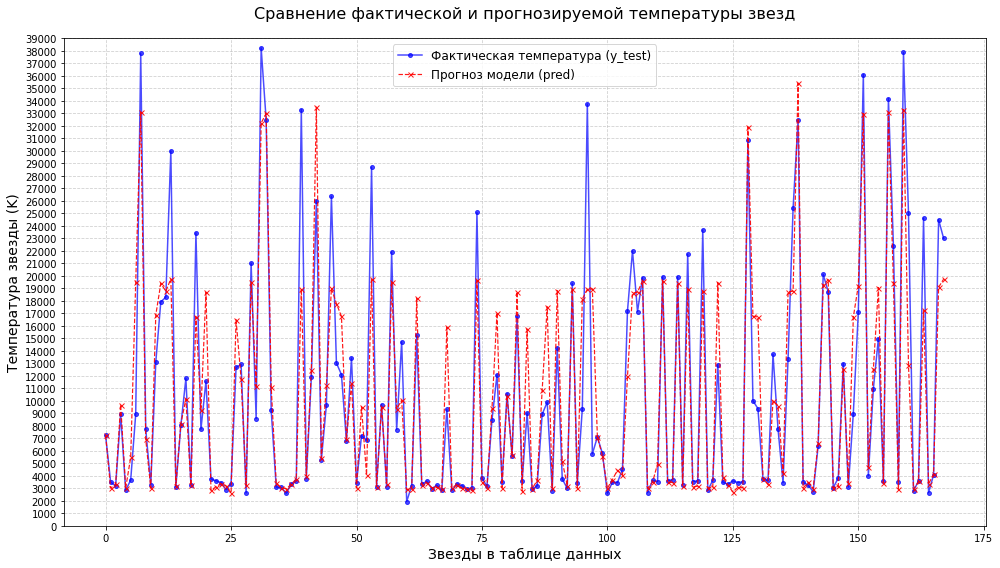

In [81]:
plot_(deep_model2,train_X,train_y)

Cоздаем еще одну модель с использованием BatchNorm

In [ ]:
видим, что Batchnorm не улучшает модель, отказываемся от его использования. Пробуем строить модель с drop_out

In [46]:
class Baseline_batch(nn.Module):
    def __init__(self, layer_sizes=[20, 200, 36, 16, 1], use_batchnorm=True):
       
        super(Baseline_batch, self).__init__()
        self.layers = nn.ModuleList()
        self.batchnorms = nn.ModuleList() if use_batchnorm else None
        self.relu = nn.ReLU()
        self.use_batchnorm = use_batchnorm

        for i in range(len(layer_sizes)-1):
            self.layers.append(nn.Linear(layer_sizes[i], layer_sizes[i+1]))
            if use_batchnorm and i < len(layer_sizes)-2:  
                self.batchnorms.append(nn.BatchNorm1d(layer_sizes[i+1]))
        
    def forward(self, x):
        for i, layer in enumerate(self.layers):
            x = layer(x)
            
            if i != len(self.layers)-1:
                if self.use_batchnorm:
                    x = self.batchnorms[i](x)
                x = self.relu(x)
                
        return x

In [47]:
model_batch = Baseline(layer_sizes=[20, 256, 36, 128, 64,8, 32, 16, 1])

In [48]:
train_with_rmse(model=model_batch,batch_size=30,
    X_train=train_X,
    y_train=train_y,
    X_val=test_X,
    y_val=test_y)

Epoch [100/2000] | Train RMSE: 9419.50 K | Val RMSE: 9964.21
Epoch [200/2000] | Train RMSE: 6307.60 K | Val RMSE: 6604.73
Epoch [300/2000] | Train RMSE: 5591.56 K | Val RMSE: 5909.10
Epoch [400/2000] | Train RMSE: 5097.99 K | Val RMSE: 5510.66
Epoch [500/2000] | Train RMSE: 4715.03 K | Val RMSE: 5250.13
Epoch [600/2000] | Train RMSE: 4435.14 K | Val RMSE: 5103.52
Epoch [700/2000] | Train RMSE: 4235.75 K | Val RMSE: 5036.02
Epoch [800/2000] | Train RMSE: 4091.05 K | Val RMSE: 5025.88
Epoch [900/2000] | Train RMSE: 3981.91 K | Val RMSE: 5045.27
Epoch [1000/2000] | Train RMSE: 3899.23 K | Val RMSE: 5074.24
Epoch [1100/2000] | Train RMSE: 3832.99 K | Val RMSE: 5096.48
Epoch [1200/2000] | Train RMSE: 3778.22 K | Val RMSE: 5109.81
Epoch [1300/2000] | Train RMSE: 3730.98 K | Val RMSE: 5126.35
Epoch [1400/2000] | Train RMSE: 3688.85 K | Val RMSE: 5127.93
Epoch [1500/2000] | Train RMSE: 3652.28 K | Val RMSE: 5134.13
Epoch [1600/2000] | Train RMSE: 3617.80 K | Val RMSE: 5135.21
Epoch [1700/2000]

KeyboardInterrupt: 

In [75]:
class AdvancedBaseline(nn.Module):
    def __init__(self, layer_sizes=[20, 256, 36, 128, 64, 8, 32, 16, 1]):
        super(AdvancedBaseline, self).__init__()
        self.layer_sizes = layer_sizes
        self.layers = nn.ModuleList()
        
        # Создаем слои с BatchNorm и Dropout
        for i in range(len(layer_sizes)-1):
            self.layers.append(nn.Linear(layer_sizes[i], layer_sizes[i+1]))
            if i < len(layer_sizes)-2:  # Не добавляем для последнего слоя
                self.layers.append(nn.BatchNorm1d(layer_sizes[i+1]))
                self.layers.append(nn.ReLU())
                self.layers.append(nn.Dropout(0.2))
    
    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

In [76]:
new_model = AdvancedBaseline()

In [77]:
def train_with_rmse2(model, X_train, y_train, X_val, y_val, 
                   batch_sizes=[16, 25,32, 40, 45, 55],
                   num_epochs=2000):
    
    
    criterion = nn.MSELoss()
    best_batch_size = None
    best_val_rmse = float('inf')
    best_model = None
    
    for batch_size in batch_sizes:
        print(f"\nTraining with batch_size = {batch_size}")
        
        train_loader = DataLoader(X_train, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(y_train, batch_size=batch_size)
        
        # Вместо копирования создаем новую модель с той же архитектурой
        current_model = type(model)(layer_sizes=model.layer_sizes)
        optimizer = optim.Adam(current_model.parameters(), lr=0.0001, weight_decay=1e-5)
        
        train_rmse = []
        val_rmse = []
        
        for epoch in range(num_epochs):
            current_model.train()
            epoch_loss = 0
            
            for batch_X, batch_y in train_loader:
                optimizer.zero_grad()
                outputs = current_model(batch_X)
                loss = criterion(outputs, batch_y)
                loss.backward()
                optimizer.step()
                epoch_loss += loss.item()
            
            current_model.eval()
            with torch.no_grad():
                train_preds = current_model(X_train)
                train_rmse.append(np.sqrt(mean_squared_error(y_train.numpy(), train_preds.numpy())))
                
                val_preds = current_model(X_val)
                current_val_rmse = np.sqrt(mean_squared_error(y_val.numpy(), val_preds.numpy()))
                val_rmse.append(current_val_rmse)
            
            if (epoch+1) % 100 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}] | Train RMSE: {train_rmse[-1]:.2f} | Val RMSE: {val_rmse[-1]:.2f}')
        
        if min(val_rmse) < best_val_rmse:
            best_val_rmse = min(val_rmse)
            best_batch_size = batch_size
            best_model = current_model
            print(f"New best batch_size: {batch_size} with Val RMSE: {best_val_rmse:.2f}")
    
    print(f"\nBest batch_size: {best_batch_size} with Val RMSE: {best_val_rmse:.2f}")
    return best_model, best_batch_size, train_rmse, val_rmse

In [78]:
best_model, best_batch, train_hist, val_hist = train_with_rmse2(
    new_model,
    train_X,
    train_y,
    test_X,
    test_y
)


Training with batch_size = 16


ValueError: too many values to unpack (expected 2)

In [55]:
from sklearn.metrics import mean_squared_error
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

def train_with_rmse2(model, X_train, y_train, X_val, y_val, 
                   batch_sizes=[16, 32, 64, 128, 256],  # Добавлен список batch_sizes
                   num_epochs=2000):

    criterion = nn.MSELoss()
    
    best_batch_size = None
    best_val_rmse = float('inf')
    best_model_state = None
    
    for batch_size in batch_sizes:
        print(f"\nTraining with batch_size = {batch_size}")
        
        # Создаем DataLoader с текущим batch_size
        train_loader = DataLoader(X_train, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(y_train, batch_size=batch_size)
        
        # Копируем модель для каждого batch_size
        current_model = type(model)()
        current_model.load_state_dict(model.state_dict())
        optimizer = optim.Adam(current_model.parameters()) #lr=0.0001, weight_decay=1e-5)
        
        train_rmse = []
        val_rmse = []
        
        for epoch in range(num_epochs):
            current_model.train()
            epoch_loss = 0
            
            for batch_X, batch_y in train_loader:
                optimizer.zero_grad()
                outputs = current_model(batch_X)
                loss = criterion(outputs, batch_y)
                loss.backward()
                optimizer.step()
                epoch_loss += loss.item()
            
            current_model.eval()
            with torch.no_grad():
                # Вычисляем RMSE для всего набора данных
                train_preds = current_model(X_train)
                train_rmse.append(np.sqrt(mean_squared_error(y_train.numpy(), train_preds.numpy())))
                
                val_preds = current_model(X_val)
                current_val_rmse = np.sqrt(mean_squared_error(y_val.numpy(), val_preds.numpy()))
                val_rmse.append(current_val_rmse)
            
            if (epoch+1) % 100 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}] | Train RMSE: {train_rmse[-1]:.2f} | Val RMSE: {val_rmse[-1]:.2f}')
        
        # Проверяем, не улучшился ли результат
        if min(val_rmse) < best_val_rmse:
            best_val_rmse = min(val_rmse)
            best_batch_size = batch_size
            best_model_state = current_model.state_dict()
            print(f"New best batch_size: {batch_size} with Val RMSE: {best_val_rmse:.2f}")
    
    # Загружаем веса лучшей модели
    model.load_state_dict(best_model_state)
    print(f"\nBest batch_size: {best_batch_size} with Val RMSE: {best_val_rmse:.2f}")
    
    return model, best_batch_size, train_rmse, val_rmse

In [56]:
train_with_rmse2(deep_model2,train_X,
        train_y,
        test_X,test_y)


Training with batch_size = 16


RuntimeError: Error(s) in loading state_dict for Baseline:
	Unexpected key(s) in state_dict: "layers.4.weight", "layers.4.bias", "layers.5.weight", "layers.5.bias", "layers.6.weight", "layers.6.bias", "layers.7.weight", "layers.7.bias". 
	size mismatch for layers.0.weight: copying a param with shape torch.Size([256, 20]) from checkpoint, the shape in current model is torch.Size([200, 20]).
	size mismatch for layers.0.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([200]).
	size mismatch for layers.1.weight: copying a param with shape torch.Size([36, 256]) from checkpoint, the shape in current model is torch.Size([36, 200]).
	size mismatch for layers.2.weight: copying a param with shape torch.Size([128, 36]) from checkpoint, the shape in current model is torch.Size([16, 36]).
	size mismatch for layers.2.bias: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for layers.3.weight: copying a param with shape torch.Size([64, 128]) from checkpoint, the shape in current model is torch.Size([1, 16]).
	size mismatch for layers.3.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([1]).

In [87]:
trained_model, best_batch_size = train_with_rmse(
    deep_model2,
    train_X,
    train_y,
    test_X,
    test_y,
    batch_sizes=[20,25,35,45,55,60],
    num_epochs=2000
)


TypeError: train_with_rmse() got an unexpected keyword argument 'batch_sizes'

In [89]:
def train_with_rmse2(model, batch_size, X_train, y_train, X_val, y_val, 
                   dropout_rates=[0.1, 0.2, 0.3, 0.4,0.5], num_epochs=2000):
    """
    Train model with RMSE tracking and dropout rate optimization
    
    Args:
        model: PyTorch model (should have dropout layers)
        batch_size: int, batch size for training
        X_train: torch.Tensor, training features
        y_train: torch.Tensor, training targets
        X_val: torch.Tensor, validation features
        y_val: torch.Tensor, validation targets
        dropout_rates: list, dropout rates to try for each layer
        num_epochs: int, number of training epochs
    """
    criterion = nn.MSELoss()
    
    # Store best results
    best_dropout_rates = None
    best_val_rmse = float('inf')
    best_model_state = None
    
    # Generate all possible dropout rate combinations
    from itertools import product
    dropout_combinations = list(product(dropout_rates, repeat=4))  # For 4 dropout layers
    
    for rates in dropout_combinations:
        print(f"\nTraining with dropout rates: {rates}")
        
        # Apply dropout rates to model
        model.dp1.p = rates[0]
        model.dp2.p = rates[1]
        model.dp3.p = rates[2]
        model.dp4.p = rates[3]
        model.dp5.p = rates[4]
        model.dp6.p = rates[5]
        
        optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)
        train_rmse = []
        val_rmse = []
        
        for epoch in range(num_epochs):
            model.train()
            permutation = torch.randperm(X_train.size()[0])
            
            for i in range(0, X_train.size()[0], batch_size):
                indices = permutation[i:i+batch_size]
                batch_X = X_train[indices]
                batch_y = y_train[indices]
                
                optimizer.zero_grad()
                outputs = model(batch_X)
                loss = criterion(outputs, batch_y)
                loss.backward()
                optimizer.step()
            
            # Evaluation
            model.eval()
            with torch.no_grad():
                train_preds = model(X_train)
                train_rmse.append(np.sqrt(mean_squared_error(y_train.numpy(), train_preds.numpy())))
                
                val_preds = model(X_val)
                current_val_rmse = np.sqrt(mean_squared_error(y_val.numpy(), val_preds.numpy()))
                val_rmse.append(current_val_rmse)
            
            if (epoch+1) % 100 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}] | Train RMSE: {train_rmse[-1]:.2f} | Val RMSE: {val_rmse[-1]:.2f}')
        
        # Check if this dropout combination gave better results
        if min(val_rmse) < best_val_rmse:
            best_val_rmse = min(val_rmse)
            best_dropout_rates = rates
            best_model_state = model.state_dict()
            print(f"New best dropout rates: {rates} with Val RMSE: {best_val_rmse:.2f}")
    
    # Load best model state
    model.load_state_dict(best_model_state)
    print(f"\nBest dropout rates: {best_dropout_rates} with Val RMSE: {best_val_rmse:.2f}")
    
    return model, best_dropout_rates, train_rmse, val_rmse

In [91]:
trained_model, best_dropout, train_rmse, val_rmse = train_with_rmse2(
    model=deep_model2,
    batch_size=20,
    X_train=train_X,
    y_train=train_y,
    X_val=test_X,
    y_val=test_y,
    dropout_rates=[0.1, 0.2, 0.3, 0.4,0,5],
    num_epochs=500
)

print(f"Оптимальные dropout rates: {best_dropout}")


Training with dropout rates: (0.1, 0.1, 0.1, 0.1)


AttributeError: 'Baseline' object has no attribute 'dp1'

In [ ]:
best_batch_size, model = hyperparameter_search(train_X, train_y)

print("Лучший batch_size:", best_batch_size)

In [ ]:
best_params, model = hyperparameter_search(train_X, train_y)


In [ ]:
#model = Baseline(input_size=X_train.shape[1], hidden_sizes=[30,256, 128, 64],default_dropout=0.2)

In [ ]:
#model3 = Baseline(input_size=X_train.shape[1], hidden_sizes=[30,200,25,100,50,25,10],default_dropout=0.1)

## Улучшение нейронной сети

## Выводы